In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import numpy as np

def draw_objects(path, objects, labels):
    im = np.array(Image.open(path), dtype=np.uint8)
    fig, ax = plt.subplots(1)
    ax.imshow(im)
    # Create a Rectangle patch
    for obj, label in zip(objects, labels):
        rect = Rectangle(xy=(obj['left'], obj['top']),
                         width=obj['right'] - obj['left'], height=obj['bottom'] - obj['top'],
                         linewidth=1, edgecolor='r', facecolor='none')
        ax.annotate(label, (obj['left'], obj['top']), color='r', weight='bold',
                    fontsize=10, ha='left', va='bottom')
        ax.add_patch(rect)
    plt.show()

In [2]:
from elasticsearch import Elasticsearch as ES
from preprocessing.es_utils import get_faces, get_csa_images

index_name = "multiclass_nudity"
es_client = ES("http://localhost:9200")

# all faces iterator
# faces_iterator = get_faces(es_client, index_name, source=['ages', 'genders'])
# csa faces iterator
faces_iterator = get_csa_images(es_client, index_name, age_groups=['child', 'teen'])

## run the following cell repetedly to get next image

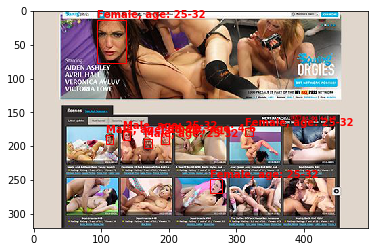

In [28]:
record = next(faces_iterator)
image_path = record["path"]
faces = record["faces"]

labels = []
for age, gender in zip(record["ages"], record['genders']):
    labels.append(f"{gender['gender']}, age: {age['age'][1:-1].replace(', ', '-')}")

draw_objects(image_path, faces, labels)